<h1>Battle of Neighborhoods - Opening a restaurant in Karnataka</h1> 

<h2>Importing Libraries</h2>

In [4]:
# Import libraries
import numpy as np # data in a vectorized manner manipulation
import pandas as pd # data analsysis
import requests # HTTP library
from bs4 import BeautifulSoup # scraping library

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import json # JSON files manipulation

from sklearn.cluster import KMeans # clustering algorithm

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

!conda install -c conda-forge geocoder --yes
import geocoder

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print("libraries imported")

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geocoder


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geocoder-1.38.1            |             py_1          53 KB  conda-forge
    ratelim-0.1.6              |             py_2           6 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          59 KB

The following NEW packages will be INSTALLED:

    geocoder: 1.38.1-py_1 conda-forge
    ratelim:  0.1.6-py_2  conda-forge


geocoder-1.38.1      | 53 KB     | ##################################### | 100% 
ratelim-0.1.6        | 6 KB      | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done

## Package Plan ##

  environme

<h2>Define Foursquare Credentials and Version</h2>

In [6]:
CLIENT_ID = ' ' # your Foursquare ID
CLIENT_SECRET = ' ' # your Foursquare Secret
VERSION = ' '
LIMIT = 150

karnataka_address = "Karnataka, India"

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(karnataka_address)
latitude =location.latitude    # location.latitude 
longitude =location.longitude  # location.longitude 
karnataka_center = [latitude, longitude ]

print('The geograpical coordinate of {} are {}, {}.'.format(karnataka_address, latitude, longitude))

The geograpical coordinate of Karnataka, India are 14.5203896, 75.7223521.


In [7]:
# Read karnataka neighborhood data 
url = "https://en.wikipedia.org/wiki/Category:Districts_of_Karnataka"
source = requests.get(url).text
soup = BeautifulSoup(source,'lxml')

neighborhoodList = []

# append the data into the list
for row in soup.find_all("div", class_="mw-category")[0].findAll("li"):
    neighborhoodList.append(row.text.replace(', Karnataka',''))
    
df_neighborhood = pd.DataFrame({"Neighborhood": neighborhoodList})
print("There are {} neighborhoods in {}".format(df_neighborhood.shape[0], karnataka_address))

There are 32 neighborhoods in Karnataka, India


In [8]:
wikipedia = 'https://en.wikipedia.org/wiki/List_of_cities_in_Karnataka_by_population'
wikipedia_page = requests.get(wikipedia)

df = pd.read_html(wikipedia_page.content, header=0)[0]

df.head()


,Rank(2011),City,District,Population2011,Population2001,Population1991
0,1,Bengaluru,Bengaluru Urban,8495492.0,5688985,3302296.0
1,2,Hubli-Dharwad,Dharwad,943788.0,786195,648298.0
2,3,Mysuru,Mysuru,920550.0,762408,606755.0
3,4,Mangaluru,Dakshina Kannada,623841.0,539387,426341.0
4,5,Belagavi,Belagavi,610350.0,506480,402412.0


In [9]:
df_new=df.drop(['Population2001','Population1991'],axis=1)
df_new

,Rank(2011),City,District,Population2011
0,1,Bengaluru,Bengaluru Urban,8495492.0
1,2,Hubli-Dharwad,Dharwad,943788.0
2,3,Mysuru,Mysuru,920550.0
3,4,Mangaluru,Dakshina Kannada,623841.0
4,5,Belagavi,Belagavi,610350.0
5,6,Kalaburagi,Kalaburagi,543147.0
6,7,Davanagere,Davanagere,434971.0
7,8,Ballari,Ballari,410444.0
8,9,Vijayapura,Vijayapura,327427.0
9,10,Shivamogga,Shivamogga,322650.0


In [10]:
# define a function to get coordinates
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, {}'.format(neighborhood,karnataka_address))
        lat_lng_coords = g.latlng
    return lat_lng_coords

coords = [ get_latlng(neighborhood) for neighborhood in df_neighborhood["Neighborhood"].tolist() ]

df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

# merge the coordinates into the original dataframe
df_neighborhood['Latitude'] = df_coords['Latitude']
df_neighborhood['Longitude'] = df_coords['Longitude']
print("Geographical coordinates of five neighborhoods are as below")
df_neighborhood.head()

Geographical coordinates of five neighborhoods are as below


,Neighborhood,Latitude,Longitude
0,► Karnataka district templates‎ (29 P),16.00000,75.00000
1,► Categories of Karnataka by district‎ (9 C),16.00000,75.00000
2,"► Bagalkot district‎ (6 C, 9 P)",16.15394,75.73525
3,"► Bangalore Rural district‎ (8 C, 5 P)",12.54620,77.42284
4,"► Bangalore Urban district‎ (7 C, 13 P)",13.00000,77.58333


In [11]:
result = pd.concat([df_new,df_neighborhood], axis=1, sort=False)
result.head(5)

,Rank(2011),City,District,Population2011,Neighborhood,Latitude,Longitude
0,1,Bengaluru,Bengaluru Urban,8495492.0,► Karnataka district templates‎ (29 P),16.00000,75.00000
1,2,Hubli-Dharwad,Dharwad,943788.0,► Categories of Karnataka by district‎ (9 C),16.00000,75.00000
2,3,Mysuru,Mysuru,920550.0,"► Bagalkot district‎ (6 C, 9 P)",16.15394,75.73525
3,4,Mangaluru,Dakshina Kannada,623841.0,"► Bangalore Rural district‎ (8 C, 5 P)",12.54620,77.42284
4,5,Belagavi,Belagavi,610350.0,"► Bangalore Urban district‎ (7 C, 13 P)",13.00000,77.58333


In [12]:
map_karnataka= folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng,  neighborhood in zip(df_neighborhood['Latitude'], df_neighborhood['Longitude'], df_neighborhood['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_karnataka)  
    
map_karnataka

<h2>Load Venues and Analyze Neighborhoods in Karnataka</h2>

In [13]:
LIMIT = 100

def getNeighborhoodVenues( latitude, longitude,neighborhood, radius=1000 ):
    venues = []
    for lat, long, neighborhood in zip(latitude, longitude ,neighborhood):

        # create the API request URL
        url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            lat,
            long,
            radius, 
            LIMIT)

        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']

        # return only relevant information for each nearby venue
        for venue in results:
            venues.append((
                neighborhood,
                lat, 
                long, 
                venue['venue']['name'], 
                venue['venue']['id'], 
                venue['venue']['location']['lat'], 
                venue['venue']['location']['lng'],  
                venue['venue']['location']['distance'],  
                venue['venue']['categories'][0]['name']))
    
    # convert the venues list into a DataFrame
    venues = pd.DataFrame(venues)
    # define the column names
    venues.columns = ['Neighborhood', 'Latitude', 'Longitude', 'VenueName', 'VenueId', 'VenueLatitude', 'VenueLongitude','VenueDistance','VenueCategory']
    return venues 

neighborhood_venues = getNeighborhoodVenues (df_neighborhood['Latitude'], df_neighborhood['Longitude'], df_neighborhood['Neighborhood'] )

print('There are {} unique venue categories. Some of them are as below:'.format(len(neighborhood_venues['VenueCategory'].unique())))
neighborhood_venues.head()
    

There are 38 unique venue categories. Some of them are as below:


,Neighborhood,Latitude,Longitude,VenueName,VenueId,VenueLatitude,VenueLongitude,VenueDistance,VenueCategory
0,"► Bangalore Rural district‎ (8 C, 5 P)",12.5462,77.42284,Vasu Hotel,4d98162bc19fb60c1c4ca765,12.549483,77.424050,388,Indian Restaurant
1,"► Bangalore Rural district‎ (8 C, 5 P)",12.5462,77.42284,Sri Srinivasa Sagar,4dea20ecb0fb8293f7cb60f0,12.546743,77.423936,133,Indian Restaurant
2,"► Bangalore Rural district‎ (8 C, 5 P)",12.5462,77.42284,Rathna Upahar,50548d88e4b08e1d3d330fb8,12.545859,77.423543,85,Indian Restaurant
3,"► Bangalore Rural district‎ (8 C, 5 P)",12.5462,77.42284,Udupi Upahara Veg,50a70aa1498ea24de04a971c,12.553102,77.424603,791,Fast Food Restaurant
4,"► Bangalore Urban district‎ (7 C, 13 P)",13.0000,77.58333,ITC Windsor,4b8fb140f964a520685d33e3,12.994131,77.585896,710,Hotel


In [14]:
print('Top 10 distinct venue counts are as below')
neighborhood_venues[['VenueId','VenueCategory']].drop_duplicates().groupby('VenueCategory').count()[['VenueId']].rename(columns={"VenueId": "Count"}).sort_values(by=['Count'], ascending=False)[:10]

Top 10 distinct venue counts are as below


,Count
VenueCategory,
Indian Restaurant,14
Café,7
Asian Restaurant,3
Hotel,3
Fast Food Restaurant,2
Plaza,2
Nightclub,2
Karnataka Restaurant,2
Snack Place,2


In [15]:
restaurant_list =['Restaurant', 'Burger Joint','Café','Fried Chicken Joint','Pizza Place']
kar_restaurant_list = ['Indian Restaurant', 'Indian Restaurant']

# Filter restaurants 
    
neighborhood_venues['RestFlag']=False
for restCat in restaurant_list:
    neighborhood_venues['RestFlag'] = neighborhood_venues['RestFlag'] | neighborhood_venues['VenueCategory'].str.contains(restCat)
    
neighborhood_restaurants = neighborhood_venues[neighborhood_venues['RestFlag'] == True].iloc[:,:-1]
kar_restaurants = neighborhood_restaurants[ neighborhood_restaurants['VenueCategory'].isin(kar_restaurant_list) ]
other_restaurants = neighborhood_restaurants[ ~neighborhood_restaurants['VenueCategory'].isin(kar_restaurant_list) ]

print('Total number of restaurants:', len(neighborhood_restaurants['VenueId'].unique()))
print('Total number of Indian restaurants:', len(kar_restaurants['VenueId'].unique()))
print('Percentage of Indian restaurants: {:.2f}%'.format(len(kar_restaurants['VenueId'].unique()) / len(neighborhood_restaurants['VenueId'].unique()) * 100))

Total number of restaurants: 32
Total number of Indian restaurants: 14
Percentage of Indian restaurants: 43.75%


3 neighborhoods do not have any karnataka restaurant


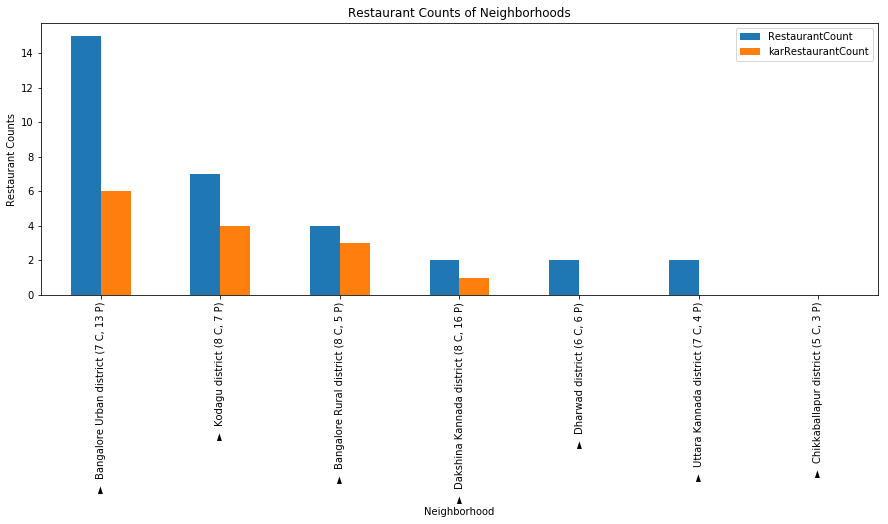

In [16]:
# get counts of restaurants in each Neighborhood
df_rest_counts =  neighborhood_restaurants.groupby(['Neighborhood']).count().rename(columns={"VenueCategory": "RestaurantCount"})[['RestaurantCount']]

#find neighborhoods that does not have any restaurant 
noRestList = list(set(neighborhood_venues['Neighborhood']) - set(neighborhood_restaurants['Neighborhood']))

#if exists , append neighborhoods without any restaurant to df_rest_counts
if noRestList != []:
    df_rest_counts = df_rest_counts.append (pd.DataFrame( {'Neighborhood' : noRestList  , 'RestaurantCount': [0] * len(noRestList) } ).set_index('Neighborhood'))

df_rest_counts.reset_index(inplace=True)

#####
# get counts of Karnataka restaurants in each Neighborhood
df_kar_rest_counts =  kar_restaurants.groupby(['Neighborhood']).count().rename(columns={"VenueCategory": "karRestaurantCount"})[['karRestaurantCount']]

#find neighborhoods that does not have any restaurant 
noRestList = list(set(neighborhood_venues['Neighborhood']) - set(kar_restaurants['Neighborhood']))

#if exists , append neighborhoods without any restaurant to df_rest_counts
if noRestList != []:
    df_kar_rest_counts = df_kar_rest_counts.append (pd.DataFrame( {'Neighborhood' : noRestList  , 'karRestaurantCount': [0] * len(noRestList) } ).set_index('Neighborhood'))

df_kar_rest_counts.reset_index(inplace=True)
df_rest_counts= df_rest_counts.merge(df_kar_rest_counts).set_index('Neighborhood')
df_rest_counts= df_rest_counts.sort_values(by=['RestaurantCount'],ascending =False)

print('{} neighborhoods do not have any karnataka restaurant'.format(len(noRestList)))
######
#Draw graph
df_rest_counts[['RestaurantCount','karRestaurantCount']].plot(kind='bar',figsize=(15,5))
plt.title('Restaurant Counts of Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Restaurant Counts')
plt.show()

<h4>We can see from the Graph :<br>

Bangalore Urban district is the neihgborhood having most restaurants<br><br>
Dharwad has restaurants , but no karnataka style restaurant<br><br>
dakshina kannada district has no restaurants<br><br>
3 neihgborhoods do not have any karnataka restaurant.</h4>

In [17]:
def getVenueRaitings(venues):
    
    raitings = []
    likes =[]
    for venueId in venues:

        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venueId, CLIENT_ID, CLIENT_SECRET, VERSION)
        result = requests.get(url).json()
        try:
            rating = result['response']['venue']['rating']
            likes = result['response']['venue']['likes']['count']
        except:
            rating = None
            likes = None
        
        raitings.append((venueId, rating,likes))
 
    # convert the venues list into a DataFrame
    rating = pd.DataFrame(raitings)
    # define the column names
    rating.columns = ['VenueId', 'VenueRating','VenueLikes']

    return rating    

restaurants_raitings = getVenueRaitings(neighborhood_restaurants['VenueId'].drop_duplicates())
restaurants_raitings.head()

,VenueId,VenueRating,VenueLikes
0,4d98162bc19fb60c1c4ca765,6.2,3.0
1,4dea20ecb0fb8293f7cb60f0,5.8,3.0
2,50548d88e4b08e1d3d330fb8,NaN,NaN
3,50a70aa1498ea24de04a971c,NaN,NaN
4,4c7fb04c2042b1f7638dc3ad,7.6,13.0


<h1>Cluster Neigborhoods</h1>

In [18]:
# one hot encoding
onehot = pd.get_dummies(neighborhood_venues[['VenueCategory']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
onehot['Neighborhood'] = neighborhood_venues['Neighborhood']

venues_grouped = onehot.groupby(["Neighborhood"]).sum().reset_index()

# move neighborhood column to the first column and filter only restaurant columns 
fixed_columns =['Neighborhood'] + list(neighborhood_venues['VenueCategory'].unique())
venues_grouped = venues_grouped[fixed_columns]

print("{}  neighborhoods' venue category are shown in {} columns as below".format(venues_grouped.shape[0],venues_grouped.shape[1]-1))
venues_grouped.head()

7  neighborhoods' venue category are shown in 38 columns as below


,Neighborhood,Indian Restaurant,Fast Food Restaurant,Hotel,Nightclub,Café,Pub,Restaurant,Department Store,Chinese Restaurant,Art Gallery,Coffee Shop,Seafood Restaurant,Monument / Landmark,Ice Cream Shop,Food & Drink Shop,Gym,Asian Restaurant,Plaza,Women's Store,Dessert Shop,Chaat Place,Gourmet Shop,Lounge,Park,Soccer Field,Snack Place,Pharmacy,Cricket Ground,Scenic Lookout,Market,Udupi Restaurant,Bus Station,Flea Market,Karnataka Restaurant,Motel,Tourist Information Center,Campground,Indie Movie Theater
0,"► Bangalore Rural district‎ (8 C, 5 P)",3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"► Bangalore Urban district‎ (7 C, 13 P)",6,1,2,2,4,1,1,2,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"► Chikkaballapur district‎ (5 C, 3 P)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
3,"► Dakshina Kannada district‎ (8 C, 16 P)",1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
4,"► Dharwad district‎ (6 C, 6 P)",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
# create a new dataframe with most common venue catrgories
def return_most_common_venues(row, num_top_venues):
    row_categories = row
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

columns = ['Neighborhood','Total Number of Venues']
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues

for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Restaurant'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Restaurant'.format(ind+1))

# create a new dataframe
venues_most = pd.DataFrame(columns = columns)

for ind in range(venues_grouped.shape[0]):
    venues_most.loc[ind, 'Neighborhood'] = venues_grouped.iloc[ind].Neighborhood
    venues_most.loc[ind, 'Total Number of Venues'] = venues_grouped.iloc[ind,1:].sum()
    venues_most.iloc[ind, 2:] = return_most_common_venues(venues_grouped.iloc[ind, 1:], num_top_venues)

venues_most.head()

,Neighborhood,Total Number of Venues,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
0,"► Bangalore Rural district‎ (8 C, 5 P)",4,Indian Restaurant,Fast Food Restaurant,Art Gallery,Asian Restaurant,Gym,Food & Drink Shop,Ice Cream Shop,Monument / Landmark,Seafood Restaurant,Coffee Shop
1,"► Bangalore Urban district‎ (7 C, 13 P)",37,Indian Restaurant,Café,Hotel,Nightclub,Department Store,Plaza,Seafood Restaurant,Gym,Food & Drink Shop,Ice Cream Shop
2,"► Chikkaballapur district‎ (5 C, 3 P)",2,Snack Place,Pharmacy,Indie Movie Theater,Plaza,Gym,Food & Drink Shop,Ice Cream Shop,Monument / Landmark,Seafood Restaurant,Coffee Shop
3,"► Dakshina Kannada district‎ (8 C, 16 P)",4,Indian Restaurant,Café,Snack Place,Cricket Ground,Nightclub,Hotel,Pub,Restaurant,Department Store,Chinese Restaurant
4,"► Dharwad district‎ (6 C, 6 P)",2,Asian Restaurant,Café,Indie Movie Theater,Art Gallery,Gym,Food & Drink Shop,Ice Cream Shop,Monument / Landmark,Seafood Restaurant,Coffee Shop


<h3>Cluster and find similarities between neighborhoods</h3>

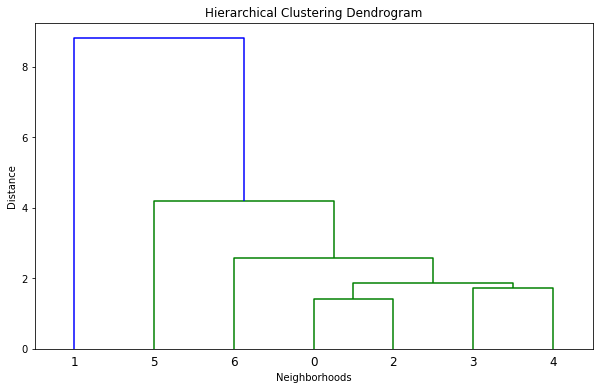

In [20]:
import scipy.cluster.hierarchy as shc

data = venues_grouped.iloc[:,3:]
plt.figure(figsize=(10, 6))   
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Neighborhoods')
plt.ylabel('Distance')
plt.axhline(y=20, c='k')
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [21]:
from sklearn.cluster import AgglomerativeClustering

kclusters= 6
cluster = AgglomerativeClustering(n_clusters=kclusters, affinity='euclidean', linkage='ward')  
clusterresult = cluster.fit_predict(data)

venues_grouped['NeighborhoodCluster'] = clusterresult
venues_cluster= df_neighborhood.merge(venues_grouped[['Neighborhood','NeighborhoodCluster']])
venues_cluster =venues_cluster.merge(venues_most[['Neighborhood','1st Most Common Restaurant','2nd Most Common Restaurant','3rd Most Common Restaurant','4th Most Common Restaurant']])
venues_cluster.head()


,Neighborhood,Latitude,Longitude,NeighborhoodCluster,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant
0,"► Bangalore Rural district‎ (8 C, 5 P)",12.54620,77.42284,0,Indian Restaurant,Fast Food Restaurant,Art Gallery,Asian Restaurant
1,"► Bangalore Urban district‎ (7 C, 13 P)",13.00000,77.58333,3,Indian Restaurant,Café,Hotel,Nightclub
2,"► Chikkaballapur district‎ (5 C, 3 P)",12.95661,78.27167,0,Snack Place,Pharmacy,Indie Movie Theater,Plaza
3,"► Dakshina Kannada district‎ (8 C, 16 P)",12.94361,74.81662,5,Indian Restaurant,Café,Snack Place,Cricket Ground
4,"► Dharwad district‎ (6 C, 6 P)",15.51756,74.92365,4,Asian Restaurant,Café,Indie Movie Theater,Art Gallery


In [25]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon, poi, cluster in zip(venues_cluster['Latitude'], venues_cluster['Longitude'], venues_cluster['Neighborhood'], venues_cluster['NeighborhoodCluster']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
folium.Marker(karnataka_center).add_to(map_clusters)
folium.Circle(karnataka_center, radius=2000, fill=False, color='white').add_to(map_clusters)
folium.Circle(karnataka_center, radius=4000, fill=False, color='white').add_to(map_clusters)
folium.Circle(karnataka_center, radius=6000, fill=False, color='white').add_to(map_clusters)
folium.Circle(karnataka_center, radius=10000, fill=False, color='black').add_to(map_clusters)         
map_clusters

In [23]:
print(venues_cluster.groupby(['NeighborhoodCluster','1st Most Common Restaurant' ]).count()[['Neighborhood']].rename(columns={"Neighborhood": "Neighborhood Count"}))
venues_cluster.groupby(['NeighborhoodCluster','2nd Most Common Restaurant' ]).count()[['Neighborhood']].rename(columns={"Neighborhood": "Neighborhood Count"})

                                                Neighborhood Count
NeighborhoodCluster 1st Most Common Restaurant                    
0                   Indian Restaurant                            1
                    Snack Place                                  1
1                   Indie Movie Theater                          1
2                   Indian Restaurant                            1
3                   Indian Restaurant                            1
4                   Asian Restaurant                             1
5                   Indian Restaurant                            1


Neighborhood Count
NeighborhoodCluster 2nd Most Common Restaurant                    
0                   Fast Food Restaurant                         1
                    Pharmacy                                     1
1                   Karnataka Restaurant                         1
2                   Udupi Restaurant                             1
3                   Café                                         1
4                   Café                                         1
5                   Café                                         1